# About

Create a plot of the Hudgkin-Huxley model, using arrays from 'sec1_HH_model.mat'.

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
from scipy import special
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Directories

In [2]:
# Data files from Matlab
import_folder = 'sec1_HH_model'
import_file = 'trial1.mat'
import_file2 = 'trial2.mat'
import_file3 = 'trial3.mat'

# Directory
dir_main = os.getcwd()
dir_im = os.path.join(dir_main, 'matlab', 'data', import_folder, import_file)
dir_im2 = os.path.join(dir_main, 'matlab', 'data', import_folder, import_file2)
dir_im3 = os.path.join(dir_main, 'matlab', 'data', import_folder, import_file3)

# Import and compile data

In [3]:
dict_im = sio.loadmat(dir_im)

# Parameters

# Arrays
t_arr = np.reshape(dict_im['t'], -1)
V_arr = np.reshape(dict_im['V'], -1)
n_arr = np.reshape(dict_im['n'], -1)
m_arr = np.reshape(dict_im['m'], -1)
h_arr = np.reshape(dict_im['t'], -1)

dict_im2 = sio.loadmat(dir_im2)

# Arrays
t_arr2 = np.reshape(dict_im2['t_arr'], -1)
V_arr2 = dict_im2['v'].T

dict_im3 = sio.loadmat(dir_im3)

# Arrays
t_arr3 = np.reshape(dict_im3['t'], -1)
V_arr3 = np.reshape(dict_im3['V'], -1)

# Process arrays

In [4]:
t_show = t_arr
peak_inds = signal.find_peaks(V_arr)[0]
t_peaks = t_show[peak_inds]

theta = np.zeros(t_show.shape)
prev_ind = peak_inds[0]
theta0 = 0
for i in range(peak_inds.size-1):
    ind = peak_inds[i+1]
    T = t_show[ind] - t_show[prev_ind]
    
    # theta(t2) - theta(t1) = 2pi
    theta[prev_ind:ind] = theta0 + np.linspace(0,2*pi,num=ind-prev_ind)
    theta0 += 2*pi
    prev_ind = ind
    
# Peak times
t1 = t_show[peak_inds[3]]
t2 = t_show[peak_inds[4]]

# Figure

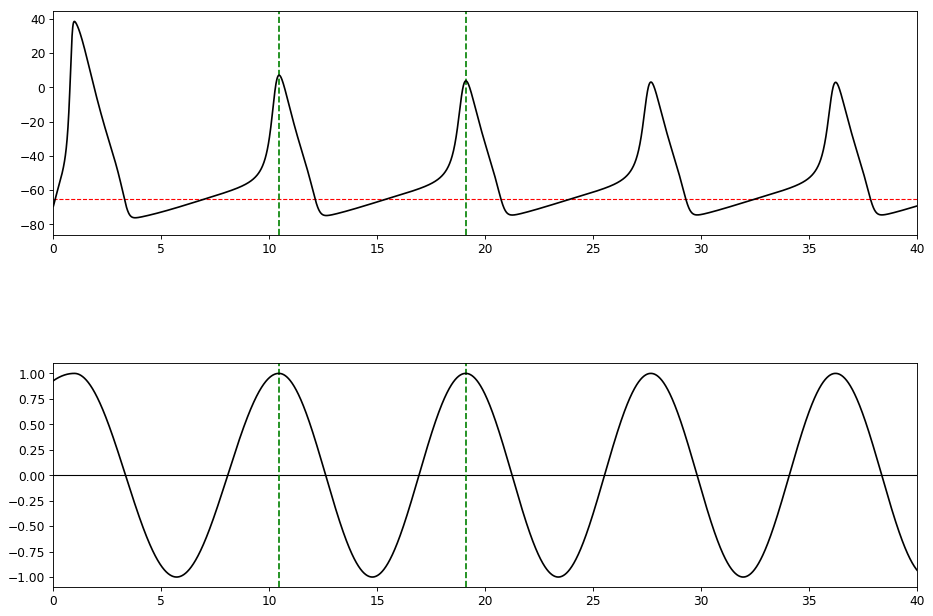

In [5]:
# Plot positions [left, bottom, width, height]
bbox0 = [0.05, 0.60, 0.90, 0.35] # Top (solution)
bbox1 = [0.05, 0.05, 0.90, 0.35] # Left (eigenvalues)

fig, ax = plt.subplots(2, figsize=(12,8), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)

# Generate plot
ax[0].plot(t_arr-20, V_arr, color='black', zorder=2)
ax[1].plot(t_arr-20, np.sin(theta+pi/2), color='black', zorder=2)

# Edit plot
ax[0].set_xlim(left=np.min(t_arr), right=40)
ax[1].set_xlim(left=np.min(t_arr), right=40)

# Add lines
ax[0].axhline(y=-65, color='red', linestyle='dashed', linewidth=1.0, zorder=0) # Resting potential
ax[1].axhline(y=0, color='black', linewidth=1.0, zorder=0)
ax[0].axvline(x=t1-20, color='green', linestyle='dashed', zorder=0)
ax[0].axvline(x=t2-20, color='green', linestyle='dashed', zorder=0)
ax[1].axvline(x=t1-20, color='green', linestyle='dashed', zorder=0)
ax[1].axvline(x=t2-20, color='green', linestyle='dashed', zorder=0)

# Tick label size
for i in range(len(ax)):
    ax[i].tick_params(labelsize=11)

In [6]:
print(t1-20, t2-20)

10.45 19.1


# Figure 2

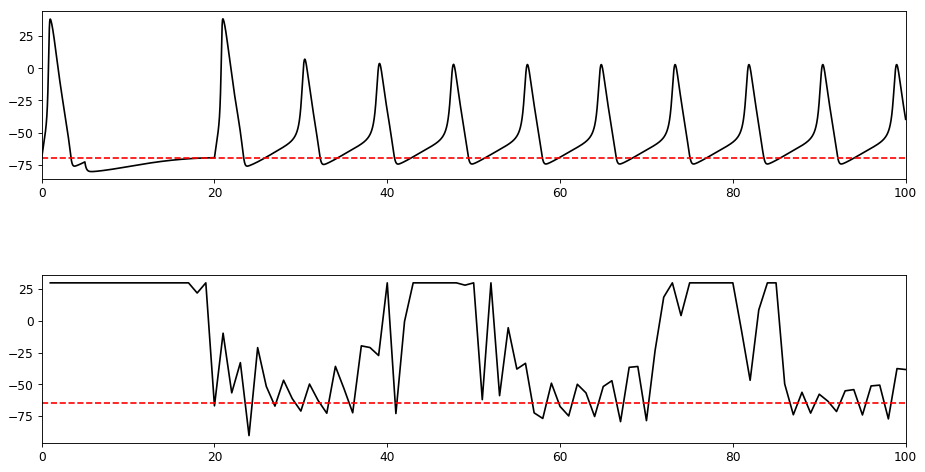

In [7]:
# Plot positions [left, bottom, width, height]
bbox0 = [0.05, 0.60, 0.90, 0.35] # Top (solution)
bbox1 = [0.05, 0.05, 0.90, 0.35] # Left (eigenvalues)

fig, ax = plt.subplots(2, figsize=(12,6), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)

# Generate plot
ax[0].plot(t_arr, V_arr, color='black', zorder=2)
ax[1].plot(t_arr2, V_arr2[:,0], color='black', zorder=2)

# Resting potential
ax[0].axhline(y=-70, color='red', linestyle='dashed') # Resting potential
ax[1].axhline(y=-65, color='red', linestyle='dashed') # Resting potential

ax[0].set_xlim(left=0, right=100)
ax[1].set_xlim(left=0, right=100)

# Tick label size
for i in range(len(ax)):
    ax[i].tick_params(labelsize=11)

# Additional figure

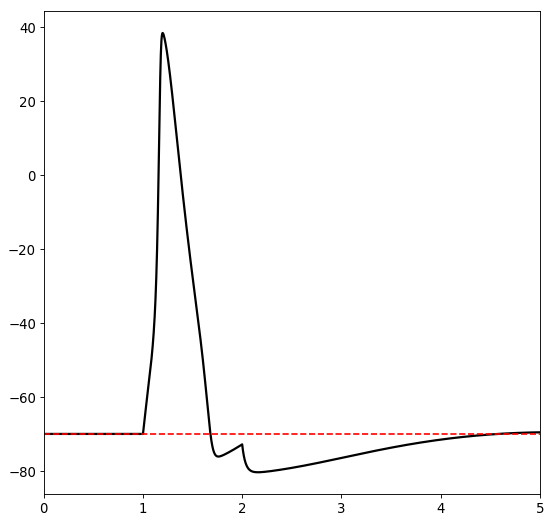

In [9]:
fig, ax = plt.subplots(1, figsize=(8,8), dpi=80)

# Generate plot
ax.plot(t_arr3/5, V_arr3, color='black', linewidth=2.0, zorder=2)

# Resting potential
ax.axhline(y=-70, color='red', linestyle='dashed') # Resting potential
ax.set_xlim(left=0, right=5)

ax.tick_params(labelsize=12)